# Arreglo de Fetures "A mano"

La calse anterior comnetamos que el tema de reducción de dimensionalidad peude pensarse como un proceso de preprocesamiento, es decir, se mejoran los features a introducir a un modelo posteriormente. Esto era algo que aprendimos a hacer "a mano" en la primer clase del curso, cuando inspeccionabamos y seleccionabamos las features que correlacionaban con el observable de interés.

A continuación les mostramos un ejemplo de un problema donde selecionamos a mano una combinación de features que mejora el rendimiento de un modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

In [ ]:
data = pd.read_csv('Datasets/datosPCA.csv', index_col = 0)
data.head()

In [ ]:
plt.scatter(data['x1'], data['x2'], c = data['y'])
plt.show()

Notar que las etiquetas crecen en una dirección "a 45 grados" con respecto a los features. Si exploramos la correlación de los features con el valor y, notamos que ninguna de las dos está correlacionada a este valor.

In [ ]:
corr = data.corr(method='pearson') # .corr is used for find corelation
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')

plt.show()

Notar que los features están altamente correlacionados entre sí y poco correlacionados con la etiqueta *y* que queremos predecir.

Tratemos de entrenar un árbol de decisión par apredecir el valor de y.

In [ ]:
X = data[['x1', 'x2']].values
y = data['y'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regresor = DecisionTreeRegressor(max_depth=1)
regresor.fit(X_train,y_train)


In [ ]:
y_train_pred = regresor.predict(X_train)
y_test_pred = regresor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))


Notemos que el modelo no es muy bueno. Sin mbargo, la información para poder predecir está en los datos y el modelo usado podría predecir mejor. El problema viene porque no realizamos una ingienería de features adecuada antes de alimentar el modelo.
Agreguemos una nueva feature, que sea la resta de las anteriores.

In [ ]:
data['x_nuevo'] = data['x2'] - data['x1']
X_new = data['x_nuevo'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)


In [ ]:
regresor = DecisionTreeRegressor(max_depth=1)
regresor.fit(X_train.reshape(-1,1),y_train)


In [ ]:
y_train_pred = regresor.predict(X_train.reshape(-1,1))
y_test_pred = regresor.predict(X_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))


La predicción, con la misma profundidad en el modelo, mejoró un montón. ¿Cómo son las correlaciones?

In [ ]:
plt.scatter(data['x_nuevo'], data['y'])

In [ ]:
corr = data.corr(method='pearson') # .corr is used for find corelation
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')

plt.show()

Con los mismos datos, pudimos predecir mucho mejor: construimos un feature mucho mas adecuado para el problema.

# Arreglo de Fetures automático

PCA nos puede ayudar a preparar automaticamente las features.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_nuevo = pca.fit_transform(X) 

In [ ]:
plt.scatter(X_nuevo[:,0], X_nuevo[:,1], c = y)

Notar qeu ahora hay un feature que esta muy correlacionado con la etiqueta. Usamos ahora estas dos features como dataset y probamos nuevamente entrenar un modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

Usamos un arbol de profundidad 1 nuevamente.

In [ ]:
regresor2 = DecisionTreeRegressor(max_depth=1)
regresor2.fit(X_train,y_train)

Notemos que el error que obtenemos usando estos dos nuevos features (obtenidos a través de PCA) es mucho menor al error que hubiesemos tenido si usábamos los features originales.

In [ ]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

## Ejemplo con imagenes

Ahora vamos a trabajar nuevamente con el dataset de MNIST. El mismo dataset ya lo usamos para resolver un problema de redes neuronales. 

### RAW DATA (sin reducción de dimensionalidad)
Primero vamos a repasar lo que ya hicimos para este dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os #esta libreria permite trabajar con funciones del sistema operativo 
import random

from sklearn.model_selection import train_test_split

**1. Carga de datos**

Cada instancia del dataset es una imagen guardada en una carpeta con la etiqueta correspondiente.

In [3]:
directorio = 'Datasets/MNIST/'

In [4]:
print(os.listdir(directorio))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [5]:
todas_imagenes = []
y_todas_imagenes = []

In [6]:
digitos = np.arange(0,10)
for digito in digitos:
    directorio = 'Datasets/MNIST/' + str(digito) + '/'
    print(digito, directorio)
    print('Hay', len(os.listdir(directorio)),'imagenes')
    for imagen in os.listdir(directorio):
        todas_imagenes.append(plt.imread(directorio + imagen))
        y_todas_imagenes.append(digito)
        
todas_imagenes = np.array(todas_imagenes)
y_todas_imagenes = np.array(y_todas_imagenes)

0 Datasets/MNIST/0/
Hay 4132 imagenes
1 Datasets/MNIST/1/
Hay 4684 imagenes
2 Datasets/MNIST/2/
Hay 4177 imagenes
3 Datasets/MNIST/3/
Hay 4351 imagenes
4 Datasets/MNIST/4/
Hay 4072 imagenes
5 Datasets/MNIST/5/
Hay 3795 imagenes
6 Datasets/MNIST/6/
Hay 4137 imagenes
7 Datasets/MNIST/7/
Hay 4401 imagenes
8 Datasets/MNIST/8/
Hay 4063 imagenes
9 Datasets/MNIST/9/
Hay 4188 imagenes


**2. Preprocesado**

**Ejercicio:** Mirar el `shape` de `X` y responder: ¿Cuántas instancias son?¿Qué ancho y largo tienen las imágenes?¿Cuántas bandas?

In [7]:
print(todas_imagenes.shape, y_todas_imagenes.shape)
n_instancias = todas_imagenes.shape[0]
ancho_imagen = todas_imagenes.shape[1]
largo_imagen = todas_imagenes.shape[2]

(42000, 28, 28) (42000,)


Miramos una imagen al azar.

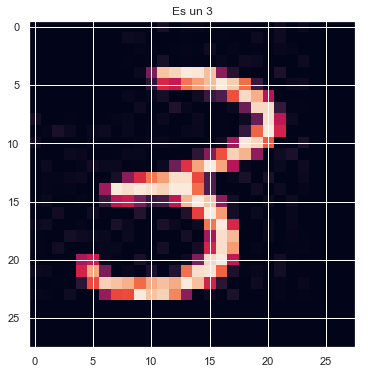

In [8]:
idx_imagen = np.random.randint(0,todas_imagenes.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_todas_imagenes[idx_imagen]))
plt.imshow(todas_imagenes[idx_imagen, :, :])
plt.show()

**Ejercicio:** Crear un arreglo `X` que sea igual a `todas_imagenes`, pero de forma `(n_instancias, largo_imagen * ancho_imagen)`.

In [9]:
X = todas_imagenes.reshape(n_instancias, largo_imagen*ancho_imagen)
print(X.shape)

(42000, 784)


**Ejercicio:** Reescalar las imágenes entre 0 y 1.

In [10]:
X = X/255

In [11]:
from keras.utils import to_categorical
y =to_categorical(y_todas_imagenes)
print(y.shape)

Using TensorFlow backend.


(42000, 10)


**Ejercicio:** hacer un `train_test_split`. Usar el 20% del dataset como conjunto de test.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

**3. Entrenamiento del modelo**

Comenzar entrenando un Red Neuronal de una capa, con diez neuronas, función de activación `softmax` y pérdida `categorical_crossentropy`. Usar como optimizador `Adam` y `epoch = 20`.

In [85]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
import time

model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
# model.add(Dense(800, activation='relu'))
model.add(Dense(10, activation='softmax'))

optimizador = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=optimizador,loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)
end = time.time()
print('Tiempo de entrenamiento:',end - start)

Train on 30240 samples, validate on 3360 samples
Epoch 1/10
30240/30240 [==============================] - 2s 76us/step - loss: 0.6308 - acc: 0.8066 - val_loss: 0.3025 - val_acc: 0.9060
Epoch 2/10
30240/30240 [==============================] - 2s 58us/step - loss: 0.2701 - acc: 0.9221 - val_loss: 0.2615 - val_acc: 0.9193
Epoch 3/10
30240/30240 [==============================] - 1s 47us/step - loss: 0.2251 - acc: 0.9337 - val_loss: 0.2358 - val_acc: 0.9277
Epoch 4/10
30240/30240 [==============================] - 1s 47us/step - loss: 0.1949 - acc: 0.9423 - val_loss: 0.2143 - val_acc: 0.9369
Epoch 5/10
30240/30240 [==============================] - 1s 47us/step - loss: 0.1731 - acc: 0.9489 - val_loss: 0.2071 - val_acc: 0.9372
Epoch 6/10
30240/30240 [==============================] - 1s 49us/step - loss: 0.1585 - acc: 0.9517 - val_loss: 0.2132 - val_acc: 0.9381
Epoch 7/10
30240/30240 [==============================] - 1s 49us/step - loss: 0.1459 - acc: 0.9559 - val_loss: 0.1951 - val_acc:

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


**Ejercicio:** Graficar la pérdida y la exactitud en función de *epochs* para validación y entrenamiento.

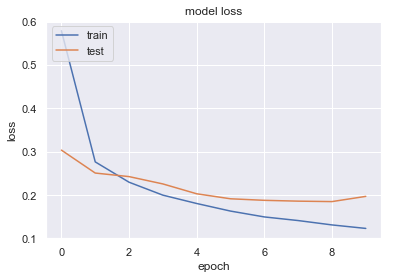

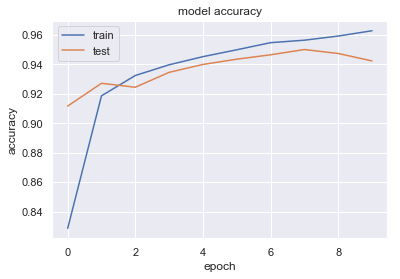

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**4. Evaluación de los resultados.**

**Ejercicio**: predecir las etiquetas de todo el set de testeo.

In [53]:
y_test_pred = model.predict(X_test)

Esto sirve para pasar de probabilidades a la etiqueta en sí. En este caso, la etiqueta es el dígito, y corresponde al número de columna.

In [54]:
y_test_pred = np.argmax(y_test_pred, axis = 1)
y_test_pred.shape

(8400,)

**Ejercicio:** Calcular exactitud y la matriz de confusión para el conjunto de entrenamiento.

In [63]:
from sklearn.metrics import confusion_matrix

y_test = np.argmax(y_test, axis = 1)

confusion_matrix(y_test, y_test_pred)

array([[807,   0,   4,   4,   1,   3,   1,   1,   5,   1],
       [  0, 896,   4,   9,   0,   1,   0,   5,  21,   1],
       [  1,   3, 809,   4,   3,   2,   0,   4,   7,   2],
       [  0,   1,  28, 809,   0,  10,   2,   4,  12,   4],
       [  2,   3,   2,   3, 761,   4,  10,   3,   5,  21],
       [  5,   1,   5,  35,   5, 670,   9,   2,  21,   6],
       [ 11,   0,   4,   0,   5,   1, 799,   1,   6,   0],
       [  1,   6,  10,   2,   6,   2,   0, 836,   4,  13],
       [  2,   3,   4,  17,   1,   5,   4,   5, 769,   3],
       [  5,   0,   0,   9,  18,   2,   0,  16,   8, 780]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9447619047619048

### Aplicamos PCA
Ahora vamos a utilizar PCA para reducir la dimensionalidad del dataset. PAra esto vamos a usar lafunción PCA que traer sklearn. Cuando definimos una isntancia de este función, le vamos a decir cuanta varianza de los datos originales queremos que quede captada en los datos reducidos. En este caso usaremos el 95%. A partir de esto, la función selecciona automaticametne el numero de componentes principales.

In [69]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [70]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [71]:
X_PC_train = pca.transform(X_train)
X_PC_test = pca.transform(X_test)

Veamos ahora como se comparan las dimensiones del dataset original con el dataset reducido:

In [72]:
X_train.shape

(33600, 784)

In [73]:
X_PC_train.shape

(33600, 159)

El nuevo dataset tine 159 features (o sea que se usaron 159 componentes principales para explicar el 95% de la varianza de los datos originales)

### Qué tan importante es cada componente?
Usamos como criterio para elegir el número de componentes tomar el 95% de la varianza del dataset original. Pero algo interesante es ver como es la evolución de esta varianza captada por el dataset reducido en función del numero de componentes tomadas.

In [26]:
# Definimos un modelo que compute todas las componentes posibles
# (si no le pasamos parametros lo hace así)
pca_total = PCA()
pca_total
pca_total.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

La importancia de cada componente esta pesada por el valor absoluto del valor singular asociado a esa componeten. Estos valores son calculados cuando entrenamos el modelo, y esta en la varaible 'singular_values_'. La varianza captada por cada componente esta dada por la proporcion del peso de la valor singular respecto a la suma de todos los valores singulares. Esto se puede cosulatr en la variable 'explained_variance_ratio_'.

Notemos que todos sumados dan 1, quiere decir que si usamos todos los componentes, reconstruiremos el 100% de la varianza del dataset original.

1.0


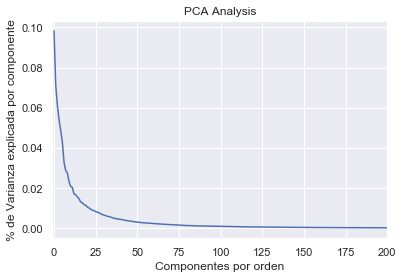

In [32]:
varianza_cada_componente = pca_total.explained_variance_ratio_
print(varianza_cada_componente.sum())

plt.ylabel('% de Varianza explicada por componente')
plt.xlabel('Componentes por orden')
plt.title('PCA Analysis')
plt.plot(varianza_cada_componente)
plt.xlim(-1,200)
plt.style.context('seaborn-whitegrid')

# Solo ploteamos las primeras 200, notemos que cae muy rápido
# (Usamos PCA para encontrar la base donde este decaimiento pasa mas rápido)

In [ ]:
varianza_cada_componente pca_total.explained_variance_ratio_.sum()

Pero lo que nos interesa realmente no es cuanto explica cada componente sola, sino cuanta varianza vamos captando a medida que incorporamos componentes a la representación. Es decir, si tomamos k componentes, debemos que sumar la varianza explicada por la primer componente, por la segunda,..., hasta la k-esima componente. Esto es lo que se llama suma acumulativa, y lo podemos hacer facilmente con la función cumsum().

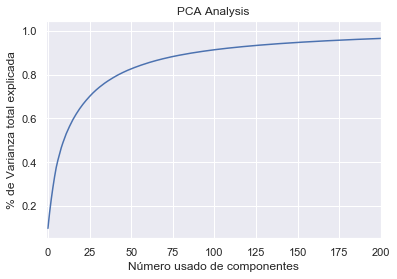

In [33]:

varianza_explicada = pca_total.explained_variance_ratio_.cumsum()

plt.ylabel('% de Varianza total explicada')
plt.xlabel('Número usado de componentes')
plt.title('PCA Analysis')
plt.plot(varianza_explicada)
plt.xlim(-1,200)
plt.style.context('seaborn-whitegrid')

### Ejercicio !!!
Entrenar nuevamente el modelo pero ahora usando este nuevo dataset reducido. Comparar el tiempo empleado en entrenar el modelo y la accuracy obtenida contra la que se obtiene por usar los datos crudos.

Entrenamos una red neuronal igual a la que usamos antes, pero esta vez la entrada a la red será a partir de la matrix reducida que obtuvimos usando PCA. Por ende, la cantidad e features que le llegan a la primer capa de neuronas es mucho menor (159 en vez de 784).

In [84]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
import time

model_pca = Sequential()
model_pca.add(Dense(16, activation='relu'))
model_pca.add(Dense(16, activation='relu'))
# model.add(Dense(800, activation='relu'))
model_pca.add(Dense(10, activation='softmax'))

optimizador = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_pca.compile(optimizer=optimizador,loss='categorical_crossentropy',
              metrics=['accuracy'])

# Medimos el tiempo que tardamos en entrenar
start = time.time()
history_pca = model_pca.fit(X_PC_train, y_train, epochs=10, validation_split=0.1)
end = time.time()
print('Tiempo de entrenamiento:',end - start)

Train on 30240 samples, validate on 3360 samples
Epoch 1/10
30240/30240 [==============================] - 2s 59us/step - loss: 0.8770 - acc: 0.7325 - val_loss: 0.3360 - val_acc: 0.9000
Epoch 2/10
30240/30240 [==============================] - 1s 38us/step - loss: 0.2944 - acc: 0.9137 - val_loss: 0.2718 - val_acc: 0.9196
Epoch 3/10
30240/30240 [==============================] - 1s 39us/step - loss: 0.2420 - acc: 0.9280 - val_loss: 0.2443 - val_acc: 0.9274
Epoch 4/10
30240/30240 [==============================] - 1s 39us/step - loss: 0.2144 - acc: 0.9372 - val_loss: 0.2262 - val_acc: 0.9354
Epoch 5/10
30240/30240 [==============================] - 1s 43us/step - loss: 0.1956 - acc: 0.9431 - val_loss: 0.2126 - val_acc: 0.9375
Epoch 6/10
30240/30240 [==============================] - 1s 39us/step - loss: 0.1818 - acc: 0.9457 - val_loss: 0.2076 - val_acc: 0.9378
Epoch 7/10
30240/30240 [==============================] - 1s 46us/step - loss: 0.1708 - acc: 0.9486 - val_loss: 0.2079 - val_acc:

Notemos que, para el mismo modelo de red, el entrenamiento tardó menos (13s en vez de 16s). Esto no parece mucho, pero a medida que los datasets se van haciendo mas grande, esta diferencia se vuelve cada vez mayor.

Por qué se tarda menos? Porque al tener menos entradas, la red precisa entrenar menos parametros:

In [86]:
model_pca.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                2560      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                170       
Total params: 3,002
Trainable params: 3,002
Non-trainable params: 0
_________________________________________________________________


Finalmente, notemos algo muy importante. No sólo ganamos en velocidad de entrenamiento, sino que también en accuracy del resultado obtenido.

In [76]:
y_test_pred_pca = model_pca.predict(X_PC_test)

In [81]:
y_test_pred_pca = np.argmax(y_test_pred_pca, axis = 1)
confusion_matrix(y_test, y_test_pred_pca)

array([[805,   1,   1,   1,   1,   1,   3,   5,   7,   2],
       [  0, 924,   0,   2,   0,   2,   1,   1,   5,   2],
       [  3,  18, 773,   3,  10,   2,  14,   6,   5,   1],
       [  0,   7,  19, 793,   1,  29,   1,   7,   7,   6],
       [  1,   5,   1,   0, 777,   1,   7,   2,   1,  19],
       [  9,   6,   0,  21,   4, 690,  13,   2,   8,   6],
       [  9,   1,   2,   1,   3,   2, 808,   0,   1,   0],
       [  2,   9,   7,   2,   2,   3,   0, 844,   0,  11],
       [  2,  19,   7,  10,   3,   8,   4,   3, 748,   9],
       [  2,   1,   2,   7,  15,   4,   0,  10,   5, 792]], dtype=int64)

In [83]:
accuracy_score(y_test, y_test_pred_pca)

0.9469047619047619

Esto se debe a que la reducción de dimensionalidad permite (en este caso), que el modelo ajuste sobre features mas relevantes para la clasificación de la imagen. 